Build the Dataset from the prepared images folders

In [1]:
from classificationmodel.dataset import dataset_generator
from classificationmodel.parameters import img_path, test_img_path, train_params

train_set, val_set, test_set = dataset_generator(img_path,
                                                 test_img_path,
                                                 train_params)

2023-06-29 11:17:12.749892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-29 11:17:12.749970: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 1000 files belonging to 4 classes.
Using 900 files for training.


2023-06-29 11:17:17.428090: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-29 11:17:17.428210: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-29 11:17:17.428304: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-EDANTKA): /proc/driver/nvidia/version does not exist
2023-06-29 11:17:17.429073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1000 files belonging to 4 classes.
Using 100 files for validation.
Found 100 files belonging to 4 classes.


Visualize some images

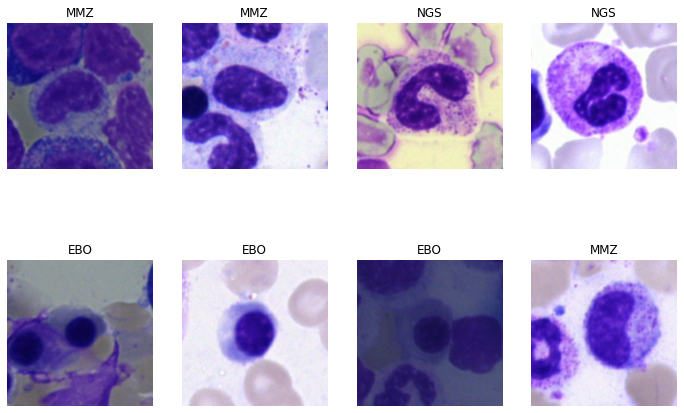

In [5]:
from classificationmodel.dataset import image_visualization
from classificationmodel.parameters import classes

image_visualization(train_set, classes)

Initialize the EfficientNet model

Loading pre-trained model from file...
Epoch 1/10
113/113 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.9800
Epoch 1: val_accuracy improved from -inf to 0.74000, saving model to best_efficientnet.h5
113/113 [==============================] - 910s 8s/step - loss: 0.0531 - accuracy: 0.9800 - val_loss: 1.1490 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 2/10
113/113 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9744
Epoch 2: val_accuracy improved from 0.74000 to 0.88000, saving model to best_efficientnet.h5
113/113 [==============================] - 792s 7s/step - loss: 0.1098 - accuracy: 0.9744 - val_loss: 0.6645 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 3/10
113/113 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9844
Epoch 3: val_accuracy improved from 0.88000 to 0.89000, saving model to best_efficientnet.h5
113/113 [==============================] - 779s 7s/step - loss: 0.0451 - accuracy: 0.9844 - val_loss: 0.680

INFO:tensorflow:Assets written to: ram://e7630513-c022-4511-9fc1-3ce6b7b434f4/assets


INFO:tensorflow:Assets written to: ram://e7630513-c022-4511-9fc1-3ce6b7b434f4/assets


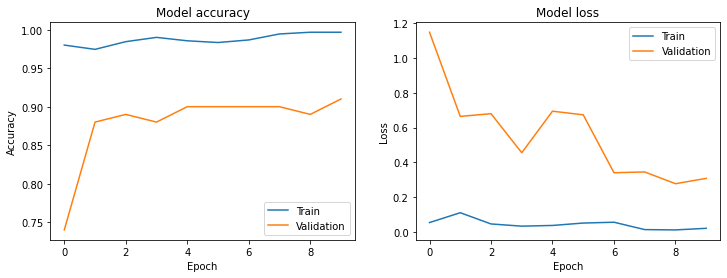

In [3]:
from classificationmodel.model import build_model, train_model, save_model, plot_history
from classificationmodel.parameters import num_classes, BATCH, EPOCHS

efficientNet = build_model(num_classes)
model_history, trained_model = train_model(efficientNet,
                                            train_set, 
                                            val_set, 
                                            BATCH, 
                                            EPOCHS)
saved_model = save_model(efficientNet, 'model.pkl')
plot_history(model_history)

Evaluate the trained model

In [4]:
from classificationmodel.evaluation import evaluate_model
from classificationmodel.parameters import classes
test_loss, test_accuracy = evaluate_model(trained_model, test_set, classes)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1/1 [==============================] - 1s 645ms/step
              precision    recall  f1-score   support

         BLA       0.80      0.80      0.80        25
         EBO       0.88      0.84      0.86        25
         MMZ       0.77      0.80      0.78        25
         NGS       0.96      0.96      0.96        25

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100

Test Loss: 0.5982240438461304
Test Accuracy: 0.8500000238418579
